<a href="https://colab.research.google.com/github/SandyLlapa/Income-Predictor-ML/blob/main/Sandy_Llapa_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

The census provides important information about a country’s population to help understand its needs and trends. Information about the population’s yearly income can be helpful in understanding the financial support that certain households may need more than others. By focusing on households that require greater financial support, public policies and government resources can be allocated efficiently. Allocating resources effectively will ensure that those in need receive adequate support, thereby reducing economic disparities.

A potential machine learning method for this task is classification. Decision trees and random forests can be used to identify relationships between factors such as age, education, and location. Classification is well-suited to this problem because it can handle non-linear relationships between variables. However, this dataset poses challenges, such as the risk of outdated information. The demographics of the population may have changed significantly over time, potentially affecting the model’s accuracy. Additionally, there may be missing or incomplete data, which can affect the model's ability to make accurate predictions.

The chosen model may also be prone to overfitting, where it learns specific patterns in the data that don’t generalize well to new cases. Furthermore, variables such as age, race, and gender can introduce bias, leading to unfair outcomes if the model heavily relies on these factors for predictions. Due to economic changes over the years, the model may need retraining with current data to learn new patterns in today’s population. This retraining would make the model more useful in predicting income based on the current economic environment.


link: [Dataset](https://archive.ics.uci.edu/dataset/2/adult)

# Exploratory Data Analysis

# Data Description

The Adult Census data set from 1994 is in CSV format and was retrieved from UC Irvine Machine Learning Respiratory.

The purpose of the dataset is to predict whether an individual's income is less than or greater than $50k using the following information: age, workplace, education, education number, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, and native country.


In [ ]:
!pip3 install -U ucimlrepo --quiet
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)
adult_df = adult.data.original



Citation:
 None


# Data Inspection



In [ ]:
print(f"Number of rows and columns: {adult_df.shape}\n")
print(f"Column names: {adult_df.columns}\n")
print(f"Data types:\n{adult_df.dtypes}\n")
print(f"Missing values:\n{adult_df.isnull().sum()}\n")
print(f"Summary statistics:\n{adult_df.describe()}\n")

Number of rows and columns: (48842, 15)

Column names: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Missing values:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-

# Data Cleaning

The columns that help determine the income of an individual will be retained, while the column fnlwgt will be dropped. Since the dataset uses the symbol '?' to represent missing values, these will be replaced with NaN values. To handle the NaN values, they will be replaced with the most frequent value in each respective column. For handling outliers, the Z-score method was applied to identify them, and these outliers were subsequently removed from the dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# add names to the columns
adult_df.columns = columns
# drop the fnlwgt, this column is unnecessary
adult_df = adult_df.drop(columns=['fnlwgt'])

# Display the updated dataset
print(adult_df.head())


# data has the symbol '?' for null value
null_counts = (adult_df == '?').sum()

# Display the number of '?' symbols
print(f"Number of missing values:\n{null_counts}")

# replace '?' with Nan
adult_df.replace('?', np.nan, inplace=True)


nan_counts = adult_df.isnull().sum()

# Display columns with NaN values
print(f"Columns with Nan values:\n{nan_counts[nan_counts > 0]}")


# Some values in the Income column have periods
adult_df['income'] = adult_df['income'].str.replace('.', '', regex=False)



   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              13  U

Since the dataset contains three columns with NaN values (workclass, occupation, and native-country), the most frequent value in each of these columns will be used to replace the NaN values in order to preserve the data.

In [ ]:
#find the most frequent value in the workclass column:
adult_df['workclass'].value_counts()

#the most frequent value in workclass is "Private", we will replace all Nan values in workclass with Private:
adult_df['workclass']= adult_df['workclass'].fillna('Private')

#find the most frequent value in the occupation column:
adult_df['occupation'].value_counts()
adult_df['occupation']= adult_df['occupation'].fillna('Prof-specialty')


#find the most frequent value in the native-country column:
adult_df['native-country'].value_counts()
adult_df['native-country']= adult_df['native-country'].fillna('United-States')




# Removing Outliers

In [ ]:
from scipy.stats import zscore

numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

print(f"Number of rows before removing outliers: {adult_df.shape[0]}")

#using z-score to identify outliers
z_scores_df = adult_df[numerical_columns].apply(zscore)

#find index of outliers
outlier_indexes = set()
for col in numerical_columns:
    outlier_indexes.update(z_scores_df[z_scores_df[col].abs() > 3].index)

#removes the rows with outliers
adult_df = adult_df[~adult_df.index.isin(outlier_indexes)]

print(f"Number of rows after removing outliers: {adult_df.shape[0]}")


Number of rows before removing outliers: 48842
Number of rows after removing outliers: 45186


# **Summary of Statistic**

Key insights:

Majority of the population have a median age of 37, is High school graduate, work in the private sector, work 40 hrs, married, and majority are from the US.

In [ ]:
summary = adult_df.describe()

print(f"Numerical Summary:\n{summary}\n")


category = adult_df.describe(include=['object'])

print(f"Categorical Summary:\n{category}")




Numerical Summary:
                age  education-num  capital-gain  capital-loss  hours-per-week
count  45186.000000   45186.000000  45186.000000  45186.000000    45186.000000
mean      38.160138      10.073540    557.695968      1.103660       39.854225
std       13.421103       2.451642   2296.318670     31.580223       11.148037
min       17.000000       3.000000      0.000000      0.000000        4.000000
25%       27.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       47.000000      12.000000      0.000000      0.000000       45.000000
max       79.000000      16.000000  22040.000000   1258.000000       77.000000

Categorical Summary:
       workclass education      marital-status      occupation relationship  \
count      45186     45186               45186           45186        45186   
unique         8        14                   7              14            6   
top      Pr

# **Visualization**

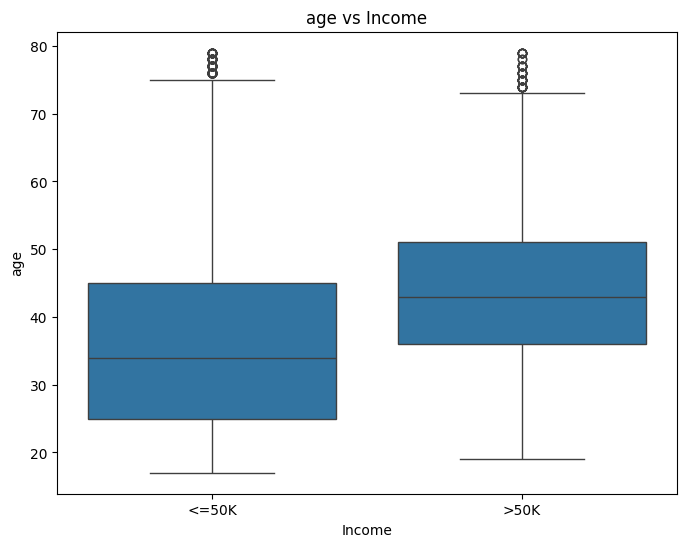

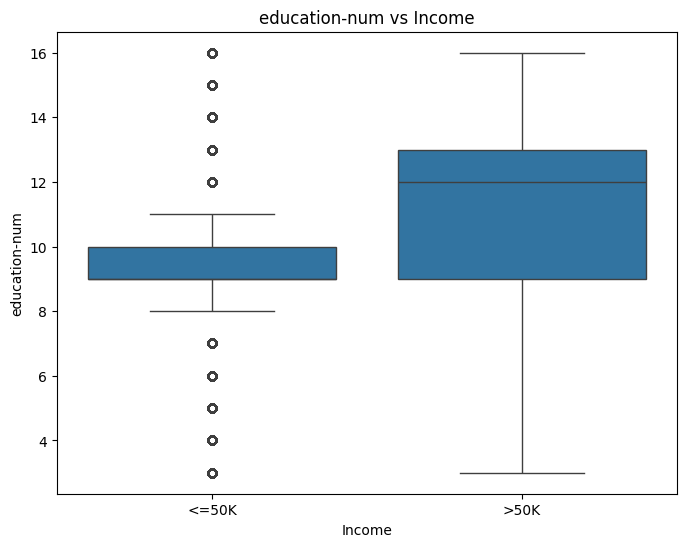

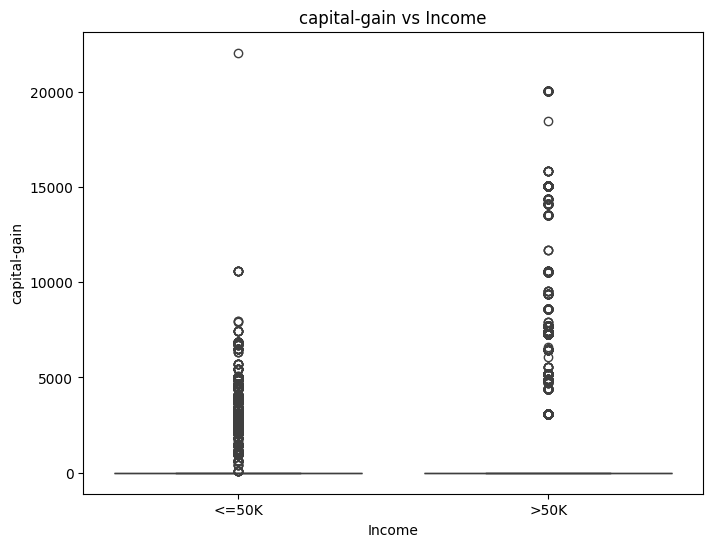

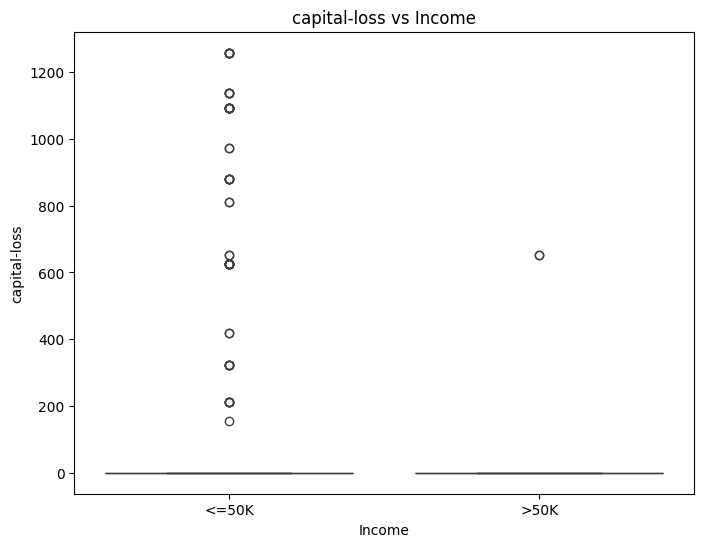

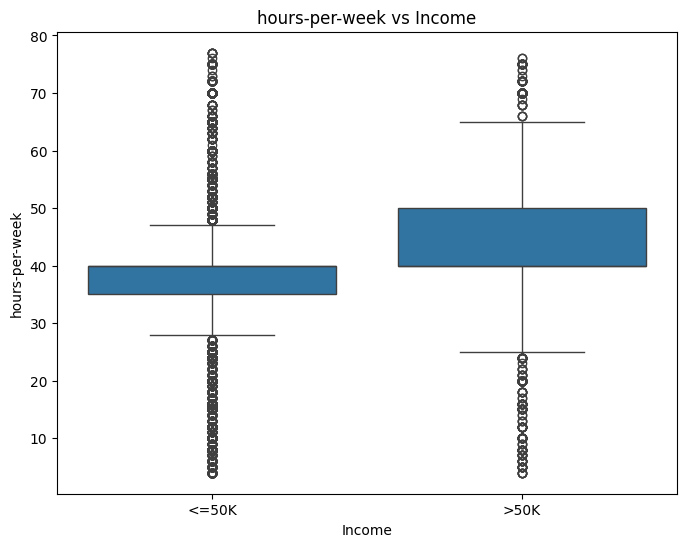

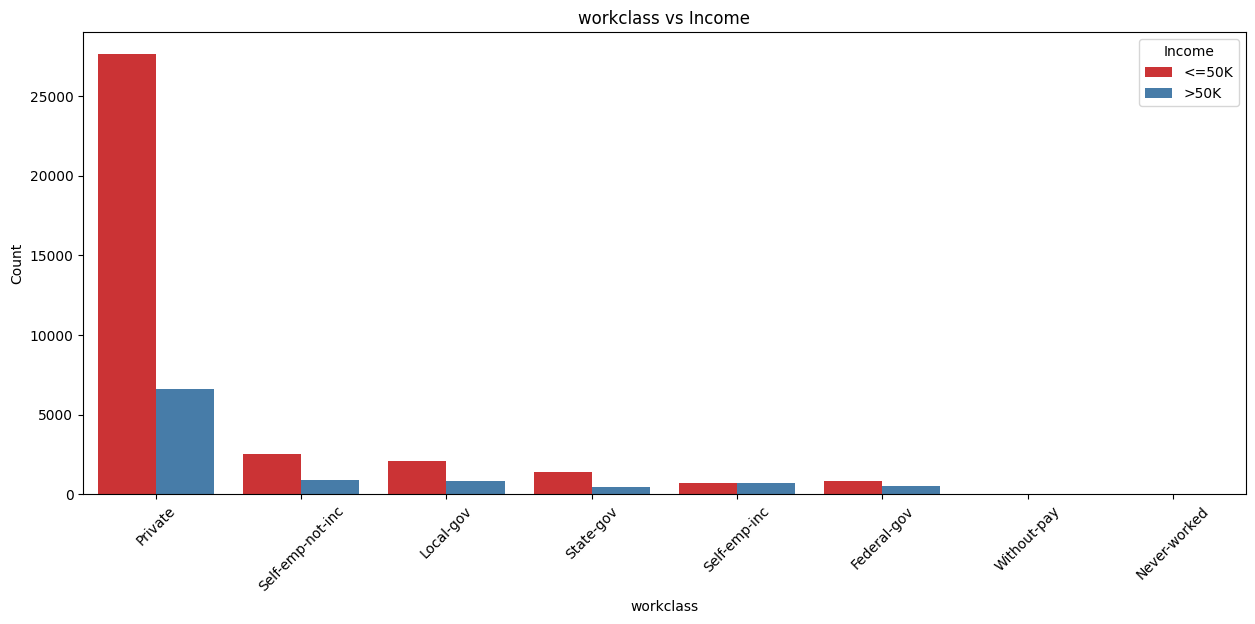

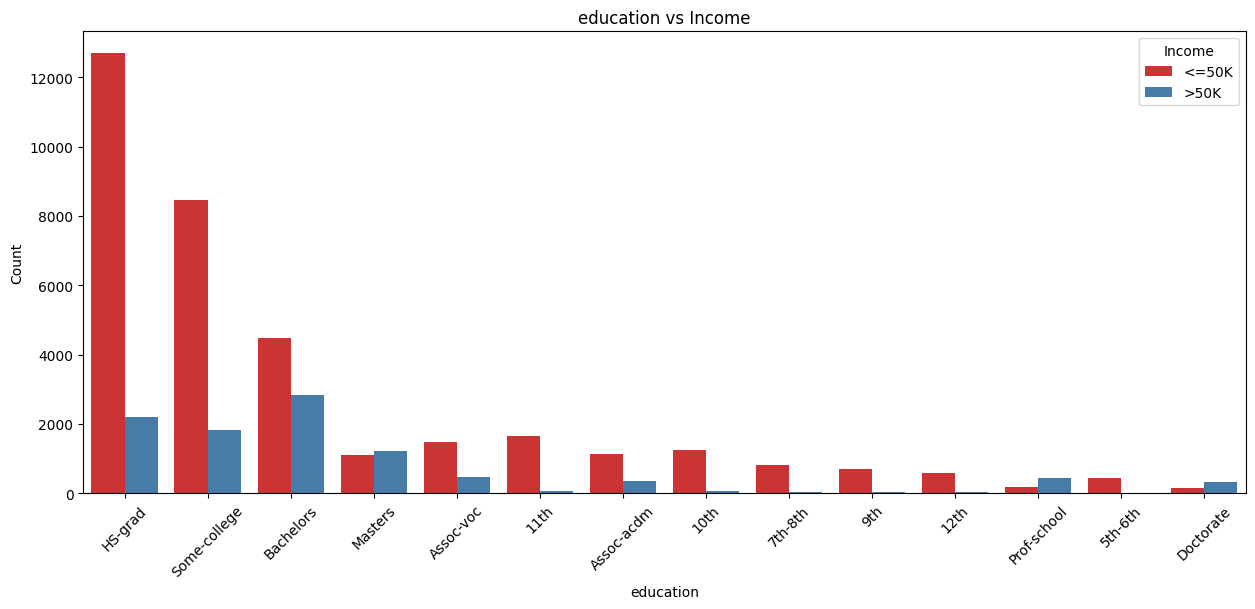

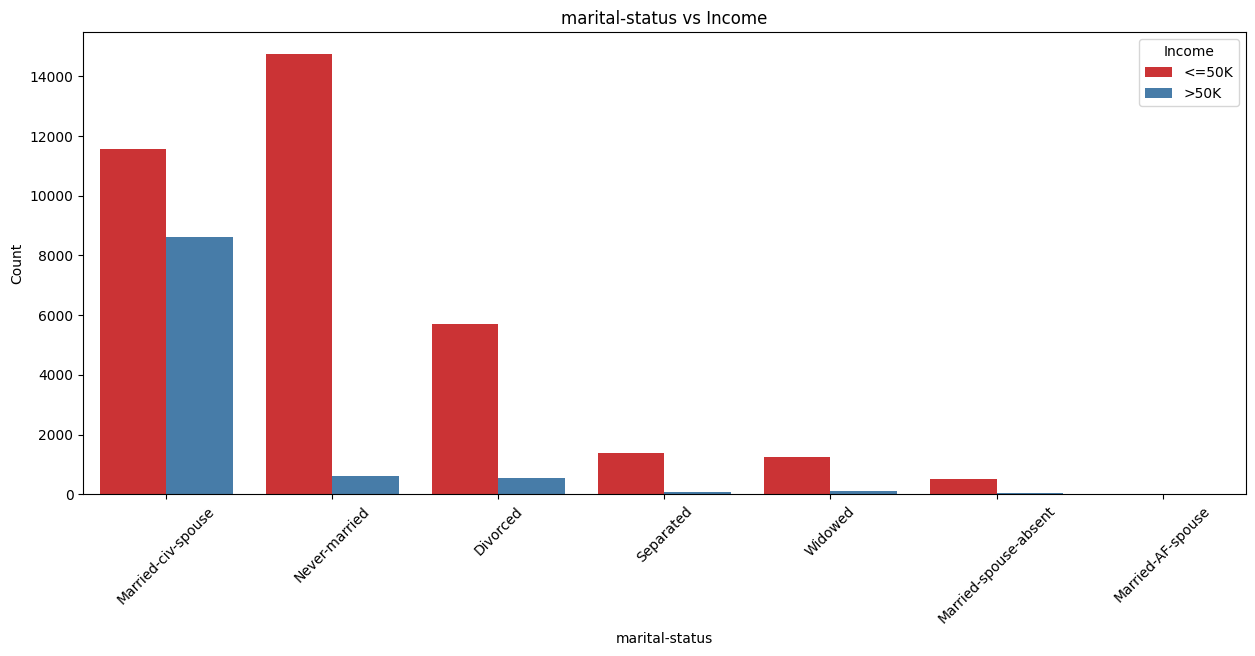

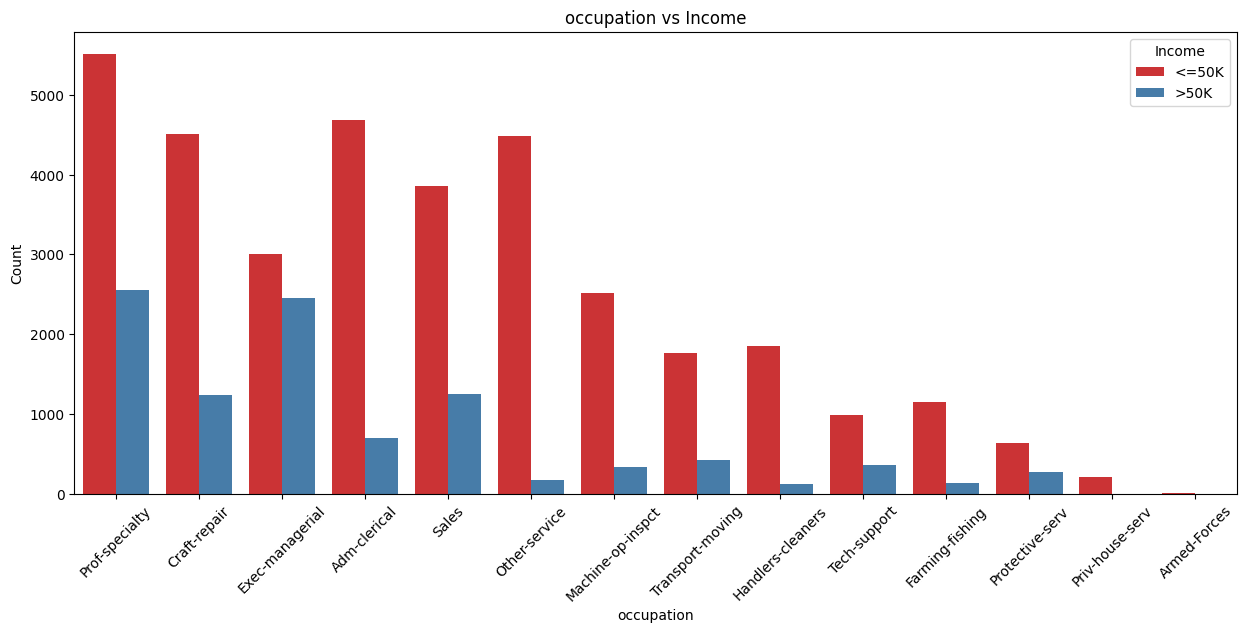

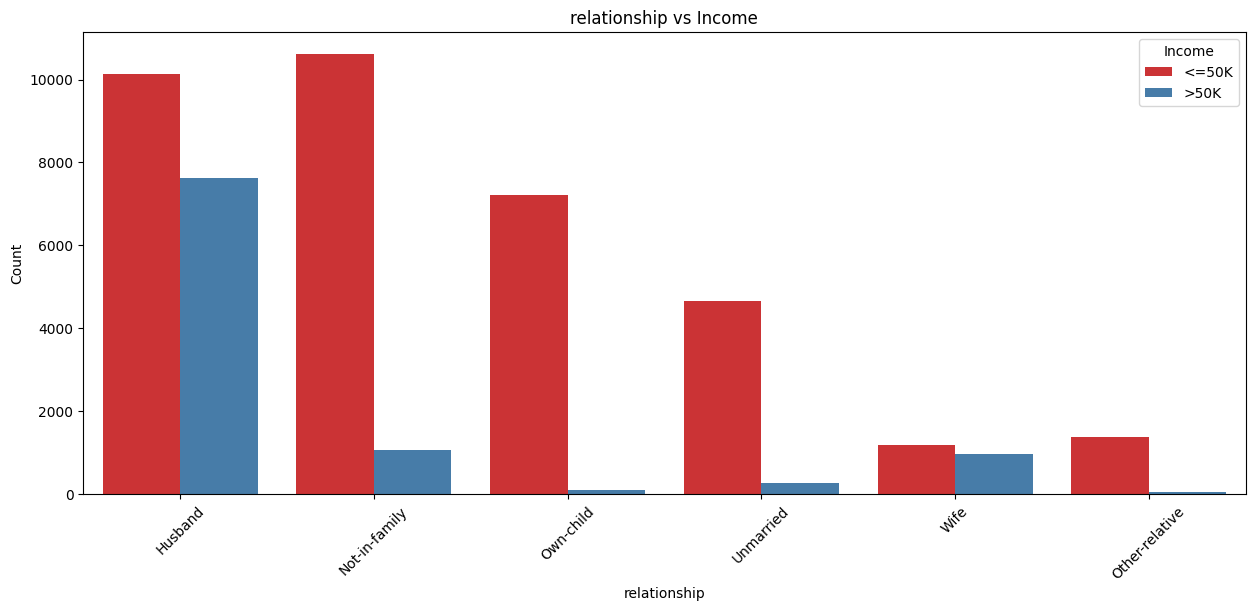

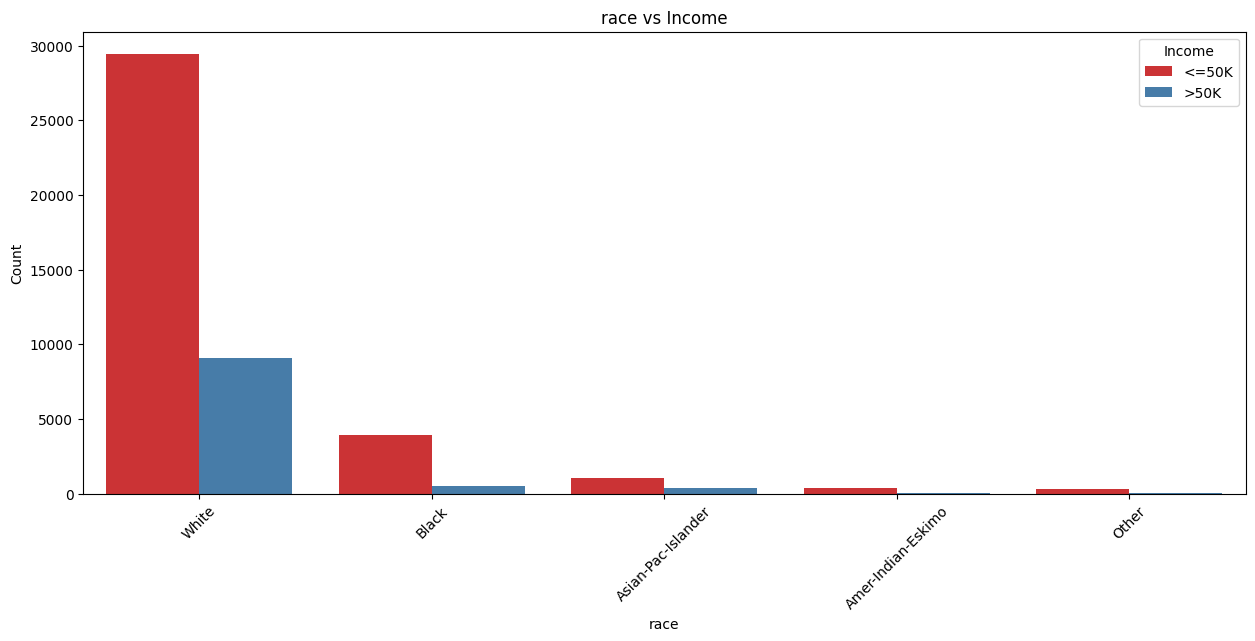

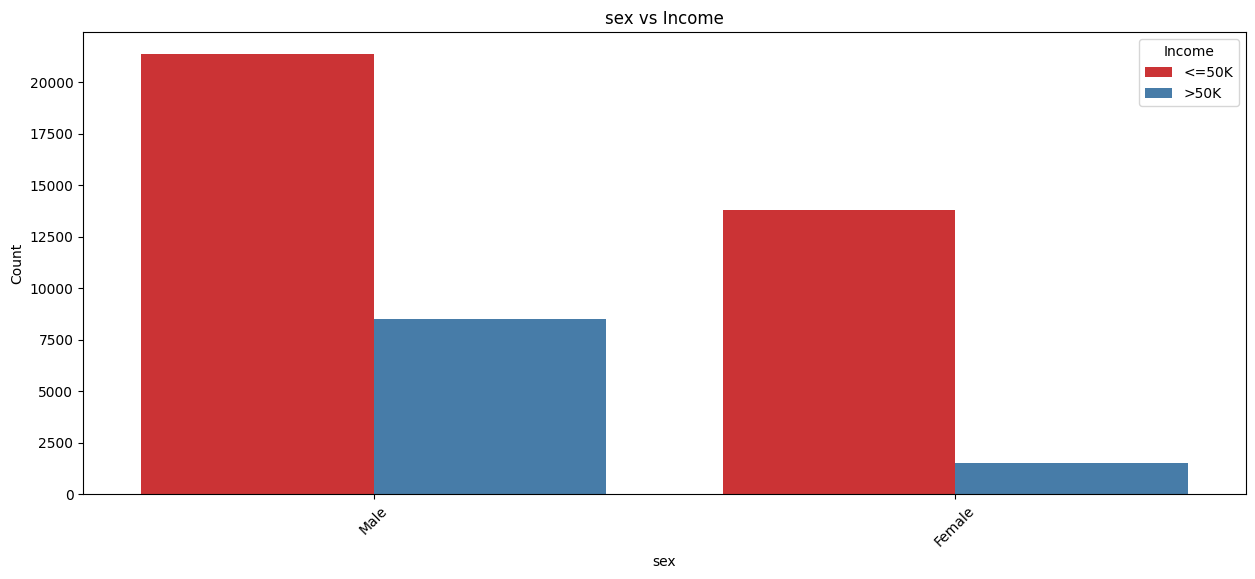

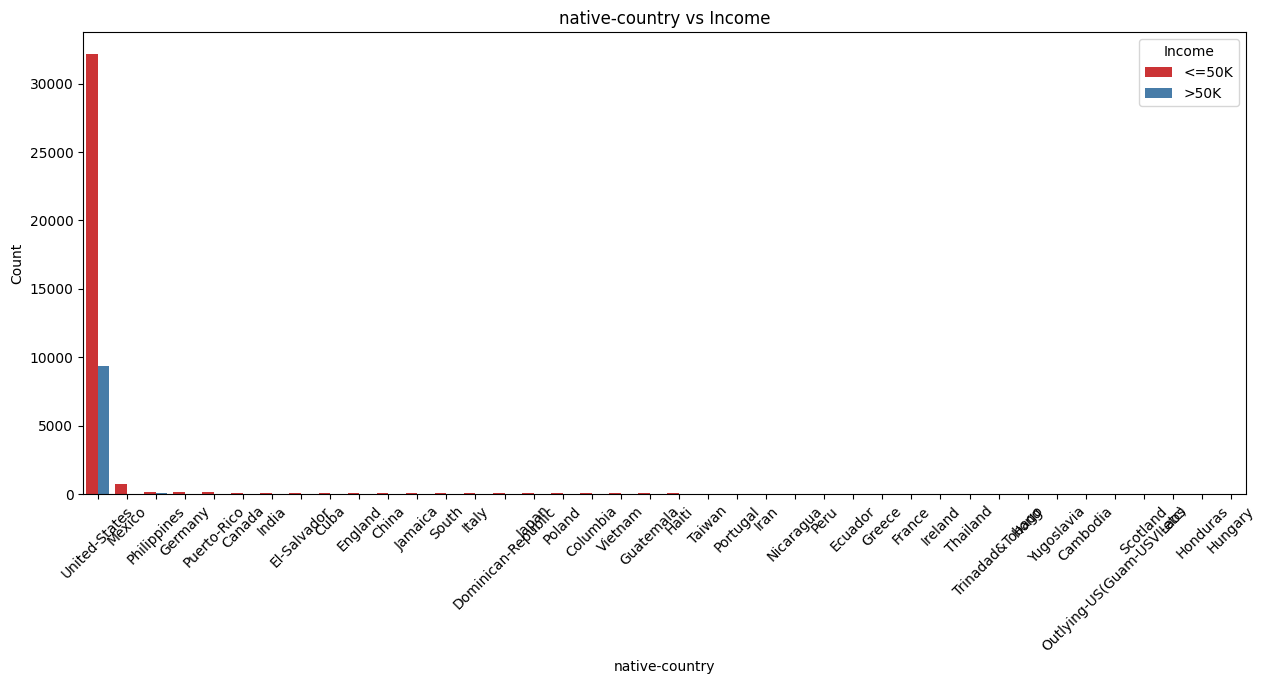

In [ ]:
numerical_columns = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']
categorical_columns = ['workclass', 'education', 'marital-status','occupation','relationship', 'race','sex','native-country']

#Using boxplot to visualize the numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=adult_df, x='income', y=column)
    plt.title(f"{column} vs Income")
    plt.xlabel("Income")
    plt.ylabel(column)
    plt.show()

#using countplot to visualize categorical columns
for column in categorical_columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=adult_df, x=column, hue='income', order=adult_df[column].value_counts().index, palette='Set1')
    plt.title(f"{column} vs Income")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Income")
    plt.show()

# Data Distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

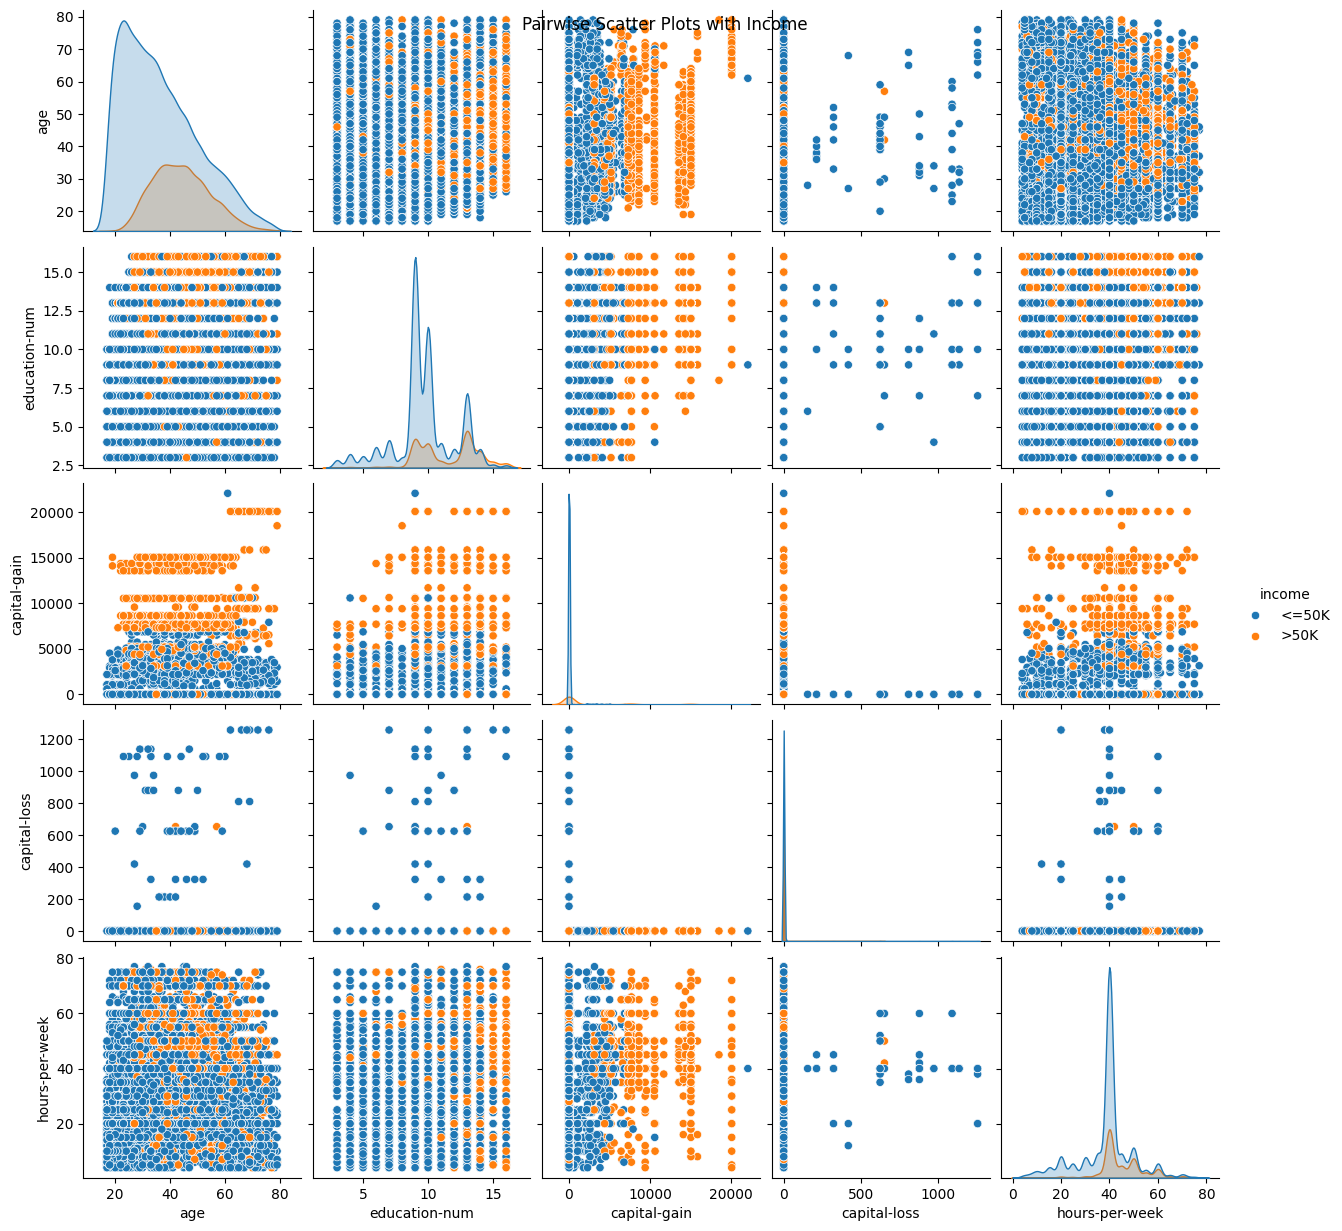

In [ ]:
sns.pairplot(adult_df, vars=numerical_columns, hue='income')
plt.suptitle("Pairwise Scatter Plots with Income")
plt.show()

# Major Insights

Boxplot - Age vs. Income: The median age for individuals earning <=50K is in their 30s, while the median for those earning >50K is in their mid-40s. Individuals older than 45 are more likely to earn a higher income compared to those aged 35 or younger.

Boxplot - Hours-per-Week vs. Income: The median hours worked per week for individuals earning <=50K is around 40 hours, whereas the median hours for those earning >50K is slightly higher than 40 hours per week.

Countplot - Workclass vs. Income: The majority of individuals working in private, self-employed, local government, state government, or federal government sectors have an income of <=50K.

Countplot - Education vs. Income: Most individuals earning <=50K have an education level lower than a bachelor's degree. On the other hand, those earning >50K tend to have a higher level of education.

Countplot - Marital Status vs. Income: The majority of individuals earning <=50K are those without a partner, whereas individuals with an income of >50K are more likely to have a partner.


#Correlation Matrix

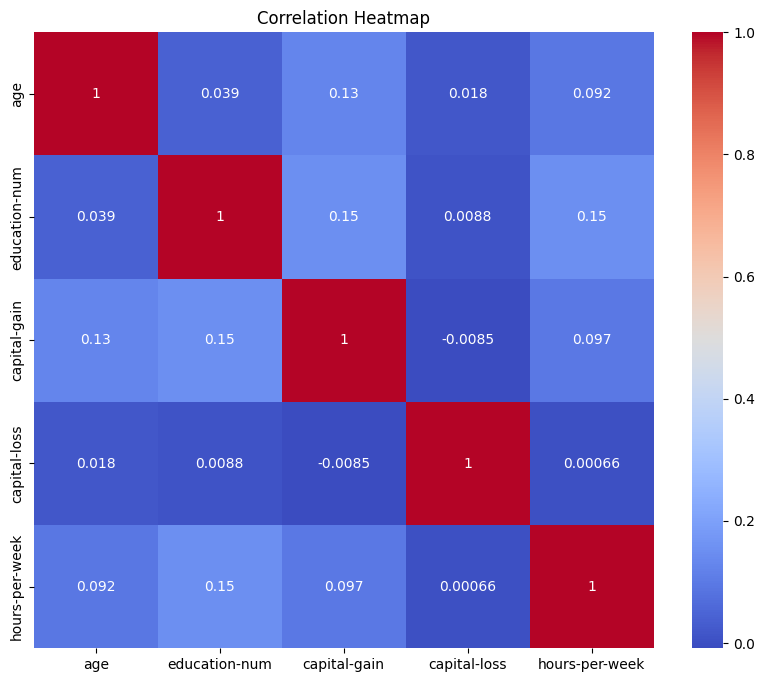

In [ ]:
correlation_matrix = adult_df[numerical_columns].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#Correlation Analysis

Key insights from the correlation coefficient:

There is a weak positive correlation of 0.15 between hours per week and education-num. Higher education may lead to working more hours.

There is a weak positive correlation of 0.15 between education-num and capital gain. Higher education may lead to higher capital gain.

There is a weak positive correlation of 0.13 between age and capital gain. Older age may lead to higher capital gain.


# Test Hypothesis

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# used columns that are most important in helping make a prediction
numerical_columns = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']
categorical_columns = ['workclass', 'education', 'marital-status','occupation','relationship', 'race','sex','native-country']

#used chi-square for categorical columns
for cols in categorical_columns:
    table = pd.crosstab(adult_df[cols], adult_df['income'])
    _, p_value, _, _= chi2_contingency(table)
    print(f"Chi-squared test for {cols}:")
    print(f"P-value: {p_value}")
    if(p_value < 0.05):
        print("Reject the null hypothesis. There is a significant association between the variables.\n")
    else:
        print("Fail to reject the null hypothesis. There is no significant association between the variables.\n")

#used t-test for numerical columns
for cols in numerical_columns:
    group1 = adult_df[adult_df['income'] == '<=50K'][cols]
    group2 = adult_df[adult_df['income'] == '>50K'][cols]
    _, p_value = ttest_ind(group1, group2, equal_var=False)

    print(f"t-test for {cols}:")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print(f"Reject the null hypothesis for {cols}. There is a significant difference in {cols} between income groups.\n")
    else:
        print(f"Fail to reject the null hypothesis for {cols}. There is no significant difference in {cols} between income groups.\n")



Chi-squared test for workclass:
P-value: 5.139099562163414e-246
Reject the null hypothesis. There is a significant association between the variables.

Chi-squared test for education:
P-value: 0.0
Reject the null hypothesis. There is a significant association between the variables.

Chi-squared test for marital-status:
P-value: 0.0
Reject the null hypothesis. There is a significant association between the variables.

Chi-squared test for occupation:
P-value: 0.0
Reject the null hypothesis. There is a significant association between the variables.

Chi-squared test for relationship:
P-value: 0.0
Reject the null hypothesis. There is a significant association between the variables.

Chi-squared test for race:
P-value: 1.5532872669616838e-91
Reject the null hypothesis. There is a significant association between the variables.

Chi-squared test for sex:
P-value: 0.0
Reject the null hypothesis. There is a significant association between the variables.

Chi-squared test for native-country:
P-v

#Hypothesis Testing Analysis


The results of the Chi-Square test indicate that workclass, education, marital status, and occupation, relationship, race, sex, and naive-country are strongly associated with income.

According to the T-Test, age, education-num, capital gain, capital loss, and hours per week all show significant differences based on income.

# Model

# Feature Engineering

Label encoding is applied to categorical features to convert them into numerical values. This includes the income column, where values are set as 1 for '>50K' and 0 for '<=50K'. Many models, such as Logistic Regression and Random Forest, perform better with numerical data, therefore, encoding was necessary.

Scaling was also performed on the dataset to ensure models like the KNN classifier and Logistic Regression could work effectively with the data.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#encoding the object to numerical
for col in adult_df.columns:
  if adult_df[col].dtype == 'object':
    encoder = LabelEncoder()
    adult_df[col] = encoder.fit_transform(adult_df[col])

print(adult_df.head())

   age  workclass  education  education-num  marital-status  occupation  \
0   39          6          8             13               4           0   
1   50          5          8             13               2           3   
2   38          3         10              9               0           5   
3   53          3          1              7               2           5   
4   28          3          8             13               2           9   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1          2174             0              40   
1             0     4    1             0             0              13   
2             1     4    1             0             0              40   
3             0     2    1             0             0              40   
4             5     2    0             0             0              40   

   native-country  income  
0              37       0  
1              37       0  
2              37   

# Feature Selection

The embedded method was used for feature selection, specifically utilizing the ExtraTreesClassifier. This method was chosen because it effectively identifies which features are most relevant for making predictions, particularly when the relationships between the features and the target variable are not always linear.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

x= adult_df.drop(columns=['income'])
y= adult_df['income']


#using extratreesclassifier to select important features
selector = ExtraTreesClassifier(random_state=50)

selector.fit(x, y)

importantFeatures = selector.feature_importances_

for i,v in enumerate(importantFeatures):
    print(f"{x.columns[i]}: {v}")


# no important features
x = x.drop(['workclass', 'education', 'race', 'sex','capital-loss', 'native-country'], axis=1)

print(x.info())


age: 0.2396515305847836
workclass: 0.04975989416294184
education: 0.03517373725924511
education-num: 0.09308517416836525
marital-status: 0.07443764899611564
occupation: 0.0937282994356317
relationship: 0.10191248873750534
race: 0.017251742955064722
sex: 0.031626232600219434
capital-gain: 0.116116625811999
capital-loss: 0.0004546338673257254
hours-per-week: 0.12653903086562363
native-country: 0.020262960555179066
<class 'pandas.core.frame.DataFrame'>
Index: 45186 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45186 non-null  int64
 1   education-num   45186 non-null  int64
 2   marital-status  45186 non-null  int64
 3   occupation      45186 non-null  int64
 4   relationship    45186 non-null  int64
 5   capital-gain    45186 non-null  int64
 6   hours-per-week  45186 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB
None


**Selected Features**

Based on the results of the feature selection, it was observed that the features native-country, capital-loss, race, sex, education, and workclass have very low scores in terms of their impact on predicting income. Therefore, the features with the highest scores: age, education-num, marital-status, occupation, relationship, capital-gain, and hours-per-week will be used in the models.

****Scaling the data****

In [ ]:
from sklearn.preprocessing import StandardScaler

for col in x.columns:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(x[[col]].values.reshape(-1, 1))


**Balancing dataset by oversampling**

To handle the imbalance of the dataset, oversampling was chosen because it works well with KNN classifier and Random Forest classifiers, as well as it can help reduce bias in the model's prediction by better representing the minority class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#oversampling was used to balance the data
balance = RandomOverSampler(random_state=50)

balance.fit(x, y)

X, Y = balance.fit_resample(x, y)

print (f"X shape: {X.shape}")
print (f"Y shape: {Y.shape}")



X shape: (70340, 7)
Y shape: (70340,)


**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Train set size: {Y_train.shape}")
print(f"Test set size: {Y_test.shape}")

Train set size: (56272, 7)
Test set size: (14068, 7)
Train set size: (56272,)
Test set size: (14068,)


**Logistic Regression / KNN Classifier / Decision Tree Classifier / Random Forest Classifier**

The learning machines I will be using are Logistic Regression, KNN Classifier, Decision Tree Classifier, and Random Forest Classifier.

These learning machines were chosen based on their straightforward approach to estimating the relationships between income and the selected features. Logistic Regression is easy to implement and computationally efficient. Unlike Logistic Regression, the KNN Classifier does not assume a linear relationship between the features and is better equipped to handle complex relationships. Similarly, the Decision Tree Classifier and Random Forest Classifier can also manage complex relationships between features and perform well with large datasets.


To validate these models the k-fold cross validation was used.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Logistic regression model
logModel = LogisticRegression(random_state=50)
logScores = cross_val_score(logModel, X_train, Y_train, cv=5).mean()
print(f"K-fold cross-validation scores for Logistic Regression:{logScores}\n")
logModel.fit(X_train,Y_train)
logPredict = logModel.predict(X_test)

#KNN model
knnModel = KNeighborsClassifier()
knnModel.fit(X_train,Y_train)
knnScores = cross_val_score(knnModel, X_train, Y_train, cv=5).mean()
print(f"K-fold cross-validation scores for KNN Classifier:{knnScores}\n")
knnPredict = knnModel.predict(X_test)

#Decision tree model
treeModel = DecisionTreeClassifier()
treeModel.fit(X_train,Y_train)
treeScores = cross_val_score(treeModel, X_train, Y_train, cv=5).mean()
print(f"K-fold cross-validation scores for Decision Tree Classifier:{treeScores}\n")
treePredict = treeModel.predict(X_test)

#Random Forest model
randomModel = RandomForestClassifier()
randomModel.fit(X_train,Y_train)
randomScores = cross_val_score(randomModel, X_train, Y_train, cv=10).mean()
print(f"K-fold cross-validation scores for Random Forest Classifier:{randomScores}\n")
randomPredict = randomModel.predict(X_test)





K-fold cross-validation scores for Logistic Regression:0.7562198077634985

K-fold cross-validation scores for KNN Classifier:0.833131859252255

K-fold cross-validation scores for Decision Tree Classifier:0.8748932705855825

K-fold cross-validation scores for Random Forest Classifier:0.8933394415618979



**Model Evaluation**

Comparing the K-fold cross-validation scores of the models shows that the Random Forest classifier achieved the highest score. This indicates that the model is better at generalizing to unseen data.

Additionally, comparing the accuracy, F1 score, precision, and recall values of the models reveals that, overall, the Random Forest classifier performs best and is more suitable for predicting the income.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

#Scores
print(f"Logistic Regression Accuracy: {accuracy_score(Y_test, logPredict)}")
print(f"Logistic Regression F1 Score: {f1_score(Y_test, logPredict)}")
print(f"Logistic Regression Precision: {precision_score(Y_test, logPredict)}")
print(f"Logistic Regression Recall: {recall_score(Y_test, logPredict)}\n")


print(f"KNN Accuracy: {accuracy_score(Y_test, knnPredict)}")
print(f"KNN F1 Score: {f1_score(Y_test, knnPredict)}")
print(f"KNN Precision: {precision_score(Y_test, knnPredict)}")
print(f"KNN Recall: {recall_score(Y_test, knnPredict)}\n")


print(f"Decision Tree Accuracy: {accuracy_score(Y_test, treePredict)}")
print(f"Decision Tree F1 Score: {f1_score(Y_test, treePredict)}")
print(f"Decision Tree Precision: {precision_score(Y_test, treePredict)}")
print(f"Decision Tree Recall: {recall_score(Y_test, treePredict)}\n")

print(f"Random Forest Accuracy: {accuracy_score(Y_test, randomPredict)}")
print(f"Random Forest F1 Score: {f1_score(Y_test, randomPredict)}")
print(f"Random Forest Precision: {precision_score(Y_test, randomPredict)}")
print(f"Random Forest Recall: {recall_score(Y_test, randomPredict)}\n")



Logistic Regression Accuracy: 0.7482940005686665
Logistic Regression F1 Score: 0.7500882207636389
Logistic Regression Precision: 0.7507770556654422
Logistic Regression Recall: 0.749400648709632

KNN Accuracy: 0.8343048052317316
KNN F1 Score: 0.8452294004382179
KNN Precision: 0.7986198243412798
KNN Recall: 0.8976166972218305

Decision Tree Accuracy: 0.8839209553596815
Decision Tree F1 Score: 0.8899818096072223
Decision Tree Precision: 0.8520381836945304
Decision Tree Recall: 0.9314624171484981

Random Forest Accuracy: 0.8967159510946829
Random Forest F1 Score: 0.9021746448528917
Random Forest Precision: 0.8631795928884308
Random Forest Recall: 0.9448596812861374



**Hyperparameter Tuning**

Based on the performances of the models, Random forest classifier will be used in the hyperparameter tuning to potentially improve its performance.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(random_state=50)

#initally it was found the optimal hyparameters was n_estimators=80, max_depth=90 but then decided to try a more finite approach by expanding on these value more.
param_grid = {
    'n_estimators': [ 80, 81, 82, 83, 84, 85],
    'max_depth': [90, 91, 92, 93, 94, 95],
    }

search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,cv=5, random_state=50)

search.fit(X_train, Y_train)


search.best_score_
search.best_params_

#random forest classifier was the model that performed well from previous tests
bestModel = RandomForestClassifier(n_estimators=82, max_depth=93, random_state=50)
bestModel.fit(X_train, Y_train)
bestPredict = bestModel.predict(X_test)

print(f"Best Model Accuracy: {accuracy_score(Y_test, bestPredict)}\n")
print(f"Best Model F1 Score: {f1_score(Y_test, bestPredict)}\n")
print(f"Best Model Precision: {precision_score(Y_test, bestPredict)}\n")
print(f"Best Model Recall: {recall_score(Y_test, bestPredict)}\n")



Best Model Accuracy: 0.8951521182826272

Best Model F1 Score: 0.9007068327162572

Best Model Precision: 0.8616692426584235

Best Model Recall: 0.9434494429558595



**Findings from the tuning process**

It was found that the optimal hyperparameters were n_estimators=82 and max_depth=93. The results indicate that the performance with and without these hyperparameters is very similar, suggesting that the model was not significantly optimized.

# Conclusion

**Key Findings**


Referring to the results of the K-fold cross-validation scores, Logistic Regression scored the lowest among all the models. This could be due to Logistic Regression's assumption of linear relationships between features. The KNN classifier performs slightly better than Logistic Regression, as expected, since it can handle non-linear relationships. The Decision Tree Classifier performs better than both KNN and Logistic Regression, as it can handle complex relationships between features. Lastly, the Random Forest Classifier achieved the highest score among all the models, indicating its effectiveness in generalization.


Referring to the results of Accuracy, F1 Score, Precision, and Recall, Logistic Regression, as expected, scored the lowest among all the models. The KNN classifier shows significant improvements over Logistic Regression; for instance, it performs better at identifying true positives but may still generate false positives. The Decision Tree Classifier and Random Forest Classifier both outperform the KNN classifier, showing strong scores across all metrics. Overall, the Random Forest Classifier has the highest scores among all the models.


Since the Random Forest Classifier performed effectively compared to all the models, this model was chosen for hyperparameter tuning to optimize its performance. It was found that with the parameters n_estimators=82 and max_depth=93, the model's accuracy, F1 Score, Precision, and Recall scores remained relatively similar to its original recorded performance.




**Problem Resolution**

The purpose of this project was to effectively predict whether an individual's income is less than or greater than `$50k`. Based on the conclusions of the model, it was found that the Random Forest Classifier can effectively solve this problem. By implementing this model, policymakers can predict the income levels of individuals in specific areas to drive meaningful change that benefits these communities. For example, if an area is identified as having a majority of individuals earning less than $50K, policymakers can use this insight to guide initiatives aimed at reducing economic disparities.

**Deployment**

To ensure the model remains accurate based on the current state of the world, new inferences would need to be made annually. Since census data is also collected on a yearly basis, obtaining new data for inference can be seamlessly integrated into this process.

Given that the model categorizes individuals into one of two income groups, human review of the results may be essential depending on the context. For instance, if a policymaker is assessing the income situation of a neighborhood, it is recommended that a human reviews the results to ensure that the right conclusions are drawn. However, in situations where critical decisions are not being made for a particular area, human review may not be as necessary.

Retraining would be necessary if there are any major changes in the economical state and policies of the world. Such shifts could alter the relationships between income and the features used by the model. Additionally, if the census incorporates new features, the model would need to be retrained to account for these new variables in its predictions.
It is also important to retrain the model to mitigate risks, such as making inaccurate predictions that could influence important decisions.

**Improvement**

To improve the model, additional data would need to be collected. For example, data about the impacts of inflations rates and job market trends can have an impact on the income level of individuals. Another suggestion would be to use Gradient Boosting Models to determine if it outperforms Random Forest Classifier and produce more accurate results.